In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


import os


<h1><center> Video Games Sales Analysis And Visualization </center></h1>
 

# Overview

> This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com](https://www.vgchartz.com/).\
    The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.\
    It is based on BeautifulSoup using Python.\
    There are 16,598 records. 2 records were dropped due to incomplete information.

## Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

## Objective

We want to have a big picture of video game industry. If we go to the market, how should we chose our first Game.

# Data Cleaning

In [2]:
data = pd.read_csv('input/videogamesales/vgsales.csv')

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
data.dropna(inplace=True)
data['Year'] = data.loc[:,'Year'].astype(int)

In [6]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Video game console and PC are the biggest subcategory in the market.Sony,Microsoft and Nintendo are the Big Three seizing console market.

- Sony: PS ,PS2, PS3, PS4, PSV, PSP
- Microsoft: XB, X360, XOne
- Nintendo: Wii,WiiU, NES, 3DS, GB, GBA,N64,NG,GC, 

We would like to see the market share of the past years.

In [7]:
df = data.copy()
df.pivot_table(index ='Year', columns='Genre', values='Global_Sales', aggfunc='sum')

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.71,NaN,NaN,NaN,NaN,7.07,NaN,0.49,NaN
1981,14.84,NaN,NaN,NaN,6.93,2.24,0.48,NaN,10.04,0.45,0.79,NaN
1982,6.52,NaN,NaN,0.87,5.03,10.03,1.57,NaN,3.79,NaN,1.05,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.48,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.18,NaN
1985,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.03,1.96,NaN
1986,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,5.57,NaN
1987,1.12,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.71,NaN,3.72,NaN
1988,1.75,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN


The data after 2015 start to missing, which may couse by lack of information. We would drop the data after 2015

In [8]:
df = df[df['Year'] <= 2015]
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Explore Data Analysis

## 1. The Big Picture

Let have a look at the development of Video Game Market.

In [9]:
Global_sales_by_year = df.groupby('Year')['Global_Sales'].sum()

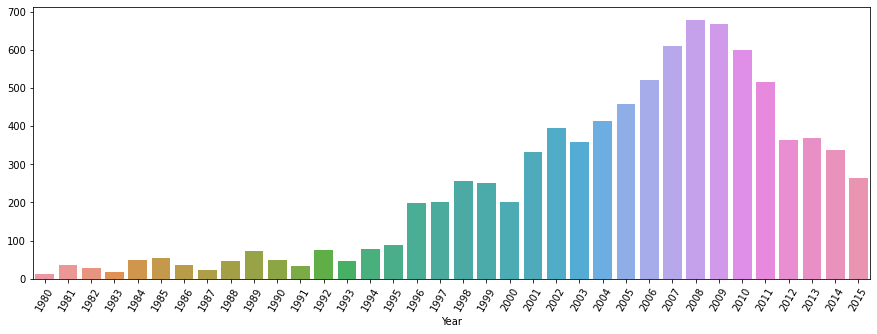

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=Global_sales_by_year.index, y=Global_sales_by_year.values)
plt.xticks(rotation=60)
plt.show()

**Introductory Stage**: The market is stable before 1996,The total annual sales flucate around 50 millions annual.

**Growth Stage**: The growth of annual total sales is quite steady before 2006.

**Maturity Stage**: The annual total  sales peak at 2008 with about 700 millions, and then start to drop. 

**Decline Stage**: The growth of annual total sales became negative.

If we want to go into the market, we will get ready for a real battle.

## 2. Platform

In [11]:
sony_console = ['PS', 'PS2', 'PS3', 'PS4', 'PSV', 'PSP']
microsoft_console = ['XB', 'X360', 'XOne']
nintendo_console = ['Wii','WiiU', 'NES', '3DS', 'GB', 'GBA','N64','GC','DS','SNES']
atari_console = ['2600']
sega_console = ['GEN', 'DC', 'SAT','SCD','GG']

def get_console_company(data):
    if data in (sony_console):
        return 'Sony'
    elif data in (microsoft_console):
        return 'Microsoft'
    elif data in (nintendo_console):
        return 'Nintendo'
    elif data in (sega_console):
        return 'Sega'
    elif data == 'PC':
        return 'PC'
    else:
        return 'Others'

df.loc[:,'Platform_manfacturer'] = df['Platform'].apply(get_console_company)
Global_sales_by_year_platform = df.groupby(['Year','Platform_manfacturer'])[['Global_Sales']].sum().reset_index()
Global_sales_by_year_platform = Global_sales_by_year_platform.merge(Global_sales_by_year,on=['Year'], how='left')
Global_sales_by_year_platform['Market_share'] = 100* Global_sales_by_year_platform['Global_Sales_x'] / Global_sales_by_year_platform['Global_Sales_y']
platform_list = df.groupby('Platform_manfacturer')['Global_Sales'].sum().sort_values(ascending=False).index
color_list = sns.color_palette("tab20",n_colors=Global_sales_by_year_platform['Platform_manfacturer'].nunique())

In [12]:
import matplotlib.colors

Sony = matplotlib.colors.to_rgb('#000080')
Microsoft = matplotlib.colors.to_rgb('#52b043')
Nintendo = matplotlib.colors.to_rgb('#e60012')
Sega = matplotlib.colors.to_rgb('#1C61AC')
Others = matplotlib.colors.to_rgb('#808080')
PC = matplotlib.colors.to_rgb('#444444')
color_series = pd.Series(index=['Sony', 'Microsoft','Nintendo','Sega', 'Others', 'PC'], data = [Sony, Microsoft,Nintendo, Sega, Others, PC])

In [13]:
sony_logo = Image.open('input/logo-img/playstation.png')
nintendo_logo = Image.open('input/logo-img/nintendo.png')
xbox_logo = Image.open('input/logo-img/xbox.png')
sony_logo = sony_logo.resize((128,128))
nintendo_logo = nintendo_logo.resize((128,128))
xbox_logo = xbox_logo.resize((128,128))


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


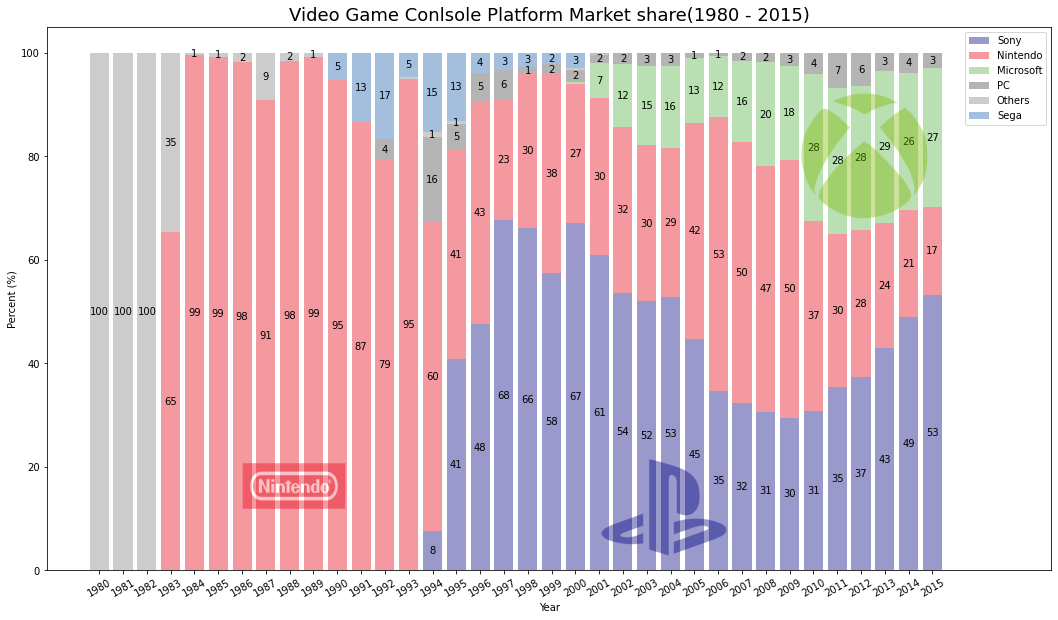

In [14]:
fig, ax = plt.subplots(1,1,figsize=(18,10))

Year = Global_sales_by_year_platform['Year'].unique()
bottom = pd.Series(index=Year,data=[0]*len(Year))
handle_list=[]

for x in platform_list:
    temp_df = Global_sales_by_year_platform[Global_sales_by_year_platform['Platform_manfacturer'] == x]

    temp_df.loc[:,'bottom']=temp_df['Year'].map(bottom)
    handle = plt.bar(data=temp_df, x='Year', height='Market_share',bottom=bottom[temp_df['Year']], color=color_series[x], alpha = 0.4) 
    for year, share in temp_df.iterrows():
        if round(share['Market_share']) >0:
            plt.text(share['Year'], share['Market_share']/2 + share['bottom'],\
                     round(share['Market_share']),\
                     verticalalignment='center',horizontalalignment='center')
    bottom.loc[temp_df['Year']] = bottom[temp_df['Year']].add(temp_df.set_index('Year')['Market_share'])
ax.set_xticks(Global_sales_by_year_platform['Year'].unique())
ax.set_xticklabels(Global_sales_by_year_platform['Year'].unique(),rotation=30)
ax.legend(platform_list)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Year')
ax.set_xlim(right=2020)
ax.set_title('Video Game Conlsole Platform Market share(1980 - 2015)', fontsize=18)
#ax1 = fig.add_axes([0.2,0.2,0.2,0.2], anchor='NE', zorder=1)
#a = fig.add_subplot(224, frameon=False)
#a.axis('off')
#a.imshow(sony_logo,extent =[0,5,0,1] , aspect= 6,zorder=2)
#ax.imshow(sony_logo,extent =[0,5,0,5],zorder=2)

fig.figimage(sony_logo, xo=600, yo=50, alpha=0.4)
fig.figimage(nintendo_logo, xo=230, yo=70, alpha=0.4)
fig.figimage(xbox_logo, xo=800, yo=400, alpha=0.4)


plt.show()

1. Nintendo dominated the market between 1983 and 1995. 
2. Sony rised quickly after 1995 and dominated the mark at 1997.
3. Microsoft became to emerge at 2001.

Sony, Microsoft and Nintendo are the big three of the market since 2002. 

**Considering the development of video game market, our futher anaylysis will base on the data since 2002.**

In [15]:
df2002 = df[df['Year'] >= 2002]
df2002

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_manfacturer
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Nintendo
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo


# 3. Publisher

The platform is dominated by big three, how about the publisher market.

In [16]:
Global_sales_by_year_publisher = df2002.groupby(['Year', 'Publisher'])[['Global_Sales']].sum().reset_index().sort_values(['Year','Global_Sales'], ascending=[True,False])
Global_sales_by_year_publisher.tail(20)
Global_sales_by_year_publisher = Global_sales_by_year_publisher.merge(Global_sales_by_year,on=['Year'], how='left')
Global_sales_by_year_publisher['Market_share'] = 100* Global_sales_by_year_publisher['Global_Sales_x'] / Global_sales_by_year_publisher['Global_Sales_y']
# focus on the publisher which have a market share above 5% for at least one year
publisher_list = Global_sales_by_year_publisher.groupby('Publisher')['Market_share'].mean().sort_values(ascending=False).head(10).index.tolist()
def publisher_clean(publisher, publisher_list=publisher_list):
    if publisher in publisher_list:
        return publisher
    else:
        return 'Others'


Global_sales_by_year_publisher['Publisher'] = Global_sales_by_year_publisher['Publisher'].apply(publisher_clean)
Global_sales_by_year_publisher = Global_sales_by_year_publisher.groupby(['Year','Publisher']).sum().reset_index()
publisher_list += ['Others']
color_list = sns.color_palette("tab20",n_colors=len(publisher_list))


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


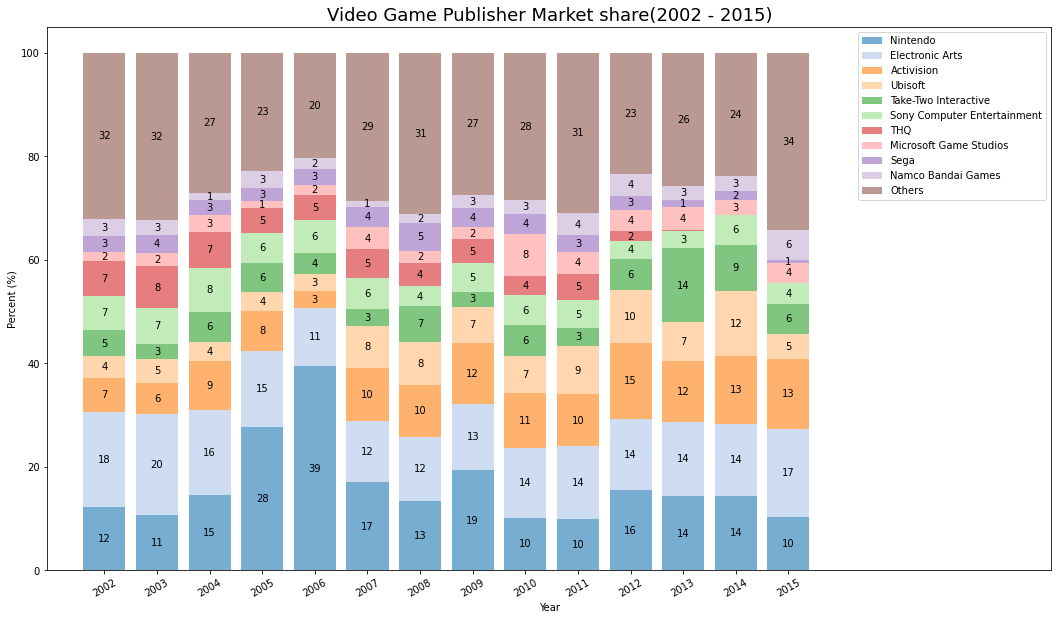

In [17]:
fig, ax = plt.subplots(1,1,figsize=(18,10))

Year = Global_sales_by_year_publisher['Year'].unique()
bottom = pd.Series(index=Year,data=[0]*len(Year))
handle_list=[]

for x in range(len(publisher_list)):
    temp_df = Global_sales_by_year_publisher[Global_sales_by_year_publisher['Publisher'] == publisher_list[x]]

    temp_df.loc[:,'bottom']=temp_df['Year'].map(bottom)
    handle = plt.bar(data=temp_df, x='Year', height='Market_share',bottom=bottom[temp_df['Year']], color=color_list[x], alpha = 0.6) 
    for year, share in temp_df.iterrows():
        if round(share['Market_share']) >0:
            plt.text(share['Year'], share['Market_share']/2 + share['bottom'],\
                     round(share['Market_share']),\
                     verticalalignment='center',horizontalalignment='center')
    bottom.loc[temp_df['Year']] = bottom[temp_df['Year']].add(temp_df.set_index('Year')['Market_share'])
ax.set_xticks(Global_sales_by_year_publisher['Year'].unique())
ax.set_xticklabels(Global_sales_by_year_publisher['Year'].unique(),rotation=30)
ax.legend(publisher_list)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Year')
ax.set_xlim(right=2020)
ax.set_title('Video Game Publisher Market share(2002 - 2015)', fontsize=18)

plt.show()

Nintendo, Electonic Arts, Activion arethe top three publisher. But there is about 60% left for the other companies. 
The publisher market is more competeitive than the platform, while there are big publishers like THQ and Sega struggle to survive.

If we want to enter the Video Game Market, publisher is a good choise.


# 4. Genre

The platform is dominated by big three, how about the publisher market.

In [18]:
Global_sales_by_year_genre = df2002.groupby(['Year', 'Genre'])[['Global_Sales']].sum().reset_index().sort_values(['Year','Global_Sales'], ascending=[True,False])
Global_sales_by_year_genre = Global_sales_by_year_genre.merge(Global_sales_by_year,on=['Year'], how='left')
Global_sales_by_year_genre['Market_share'] = 100* Global_sales_by_year_genre['Global_Sales_x'] / Global_sales_by_year_genre['Global_Sales_y']
# focus on the publisher which have a market share above 5% for at least one year
genre_list = Global_sales_by_year_genre.groupby('Genre')['Market_share'].mean().sort_values(ascending=False).head(10).index.tolist()
def column_clean(column, column_list):
    if column in column_list:
        return column
    else:
        return 'Others'


Global_sales_by_year_genre['Genre'] = Global_sales_by_year_genre['Genre'].apply(column_clean, column_list=genre_list)
Global_sales_by_year_genre = Global_sales_by_year_genre.groupby(['Year','Genre']).sum().reset_index()
genre_list += ['Others']
color_list = sns.color_palette("tab20",n_colors=len(genre_list))


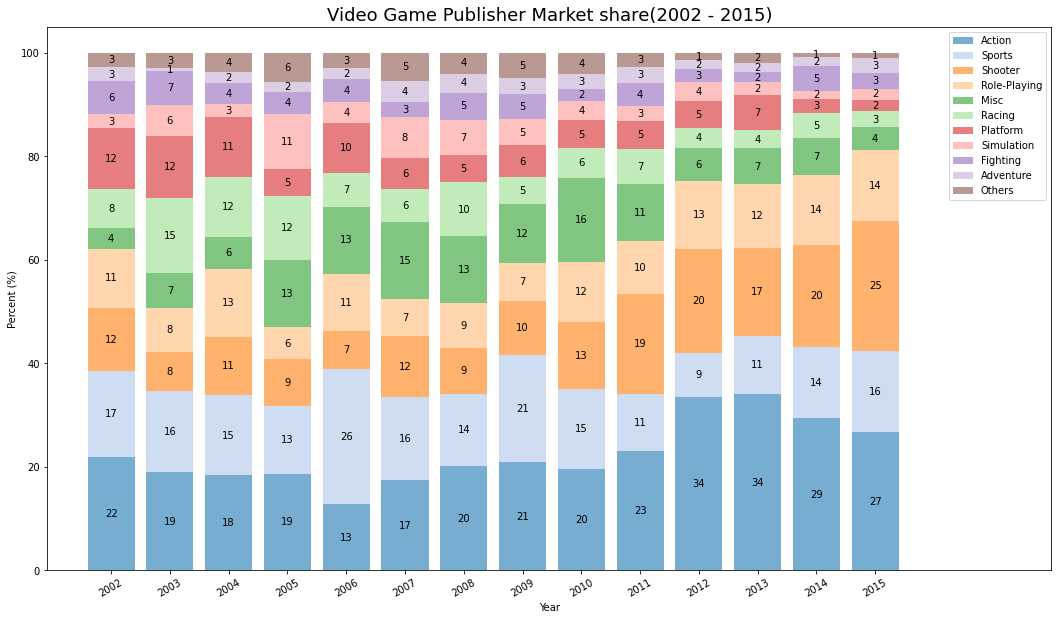

In [19]:
fig, ax = plt.subplots(1,1,figsize=(18,10))

Year = Global_sales_by_year_genre['Year'].unique()
bottom = pd.Series(index=Year,data=[0]*len(Year))
handle_list=[]

for x in range(len(genre_list)):
    temp_df = Global_sales_by_year_genre[Global_sales_by_year_genre['Genre'] == genre_list[x]]

    temp_df.loc[:, 'bottom']=temp_df['Year'].map(bottom)
    handle = plt.bar(data=temp_df, x='Year', height='Market_share',bottom=bottom[temp_df['Year']], color=color_list[x], alpha = 0.6) 
    for year, share in temp_df.iterrows():
        if round(share['Market_share']) >0:
            plt.text(share['Year'], share['Market_share']/2 + share['bottom'],\
                     round(share['Market_share']),\
                     verticalalignment='center',horizontalalignment='center')
    bottom[temp_df['Year']] = bottom[temp_df['Year']].add(temp_df.set_index('Year')['Market_share'])
ax.set_xticks(Global_sales_by_year_genre['Year'].unique())
ax.set_xticklabels(Global_sales_by_year_genre['Year'].unique(),rotation=30)
ax.legend(genre_list)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Year')
ax.set_xlim(right=2018)
ax.set_title('Video Game Publisher Market share(2002 - 2015)', fontsize=18)

plt.show()

Action, Sports, Shooter and Role-playing games become the top genres of video game market. Other types of genre are shrinking over the past ten years.

We shall dig deep into these four genres

## 4.1 Action

In [20]:
def column_clean(column, column_list):
    if column in column_list:
        return column
    else:
        return 'Others'

def market_share(df, column, top = 5):
    """
    plot for market share by year, and column
    """
    
    Global_sales_by_year = df.groupby('Year')['Global_Sales'].sum()
    df_by_year_column = df.groupby(['Year', column])[['Global_Sales']].sum().reset_index().\
        sort_values(['Year',column], ascending=[True,False])
    df_by_year_column = df_by_year_column.merge(Global_sales_by_year,on=['Year'], how='left')
    df_by_year_column.loc[:, 'Market_share'] = 100* (df_by_year_column['Global_Sales_x'] / df_by_year_column['Global_Sales_y'])
    market_share = df_by_year_column[df_by_year_column['Market_share'] > 3]
    # get top market share
    column_list = market_share.groupby(column)['Market_share'].sum().sort_values(ascending=False).head(top).index.tolist()
    df_by_year_column.loc[:, column] = df_by_year_column[column].apply(column_clean, column_list=column_list)
    df_by_year_column = df_by_year_column.groupby(['Year',column]).sum().reset_index()
    column_list += ['Others']
    color_list = sns.color_palette("tab20",n_colors=len(column_list))
    return df_by_year_column, column_list, color_list

def market_share_plot(df, column_list, color_list, column):
    fig, ax = plt.subplots(1,1,figsize=(18,10))
    temp_df = []
    Year = df['Year'].unique()
    bottom = pd.Series(index=Year,data=[0]*len(Year))

    for x in range(len(column_list)):
        temp_df = df[df[column] == column_list[x]]
        temp_df.loc[:,'bottom']=temp_df['Year'].map(bottom).copy()
        plt.bar(data=temp_df, x='Year', height='Market_share',bottom=bottom[temp_df['Year']], color=color_list[x], alpha = 0.6) 
        bottom[temp_df['Year']] = bottom[temp_df['Year']].add(temp_df.set_index('Year')['Market_share'])

        for year, share in temp_df.iterrows():
            if round(share['Market_share']) >= 1:
                plt.text(share['Year'], share['Market_share']/2 + share['bottom'],\
                     round(share['Market_share']),\
                     verticalalignment='center',horizontalalignment='center')


    ax.set_xticks(df['Year'].unique())
    ax.set_xticklabels(df['Year'].unique(),rotation=30)
    ax.legend(column_list)
    ax.set_ylabel('Percent (%)')
    ax.set_xlabel('Year')

    return fig, ax

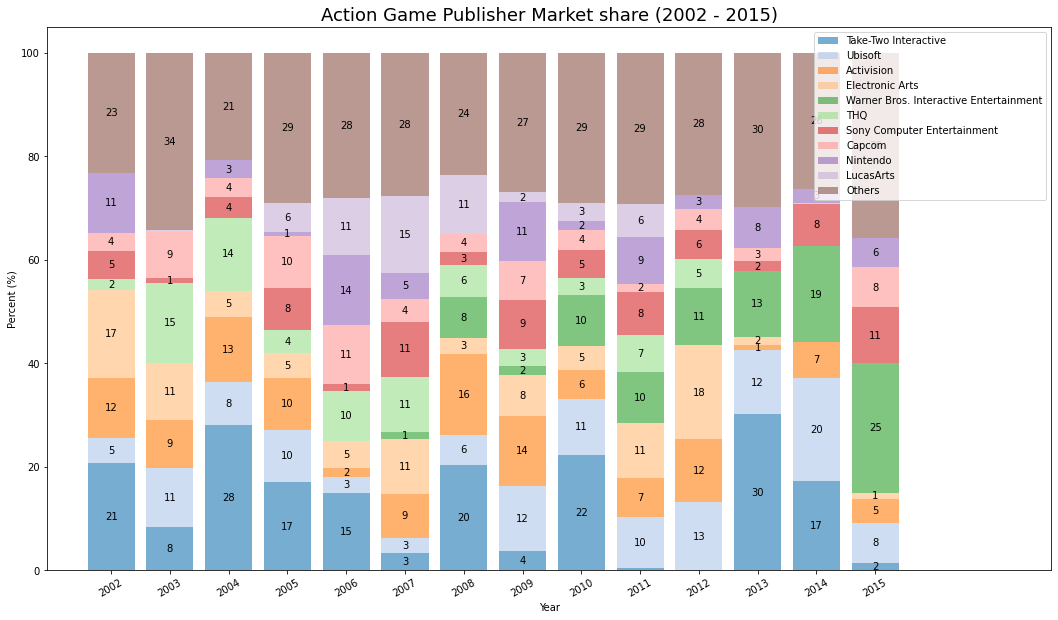

In [21]:
df_action = df2002[df2002['Genre'] == 'Action']
action_by_year_publiser, publisher_list, color_list = market_share(df_action, 'Publisher', 10)
fig, ax = market_share_plot(action_by_year_publiser, publisher_list, color_list, column = 'Publisher')

ax.set_xlim(right=2018)
ax.set_title('Action Game Publisher Market share (2002 - 2015)', fontsize=18)
plt.show()

The sales on the action game is far from stable. What is the reason?

Let take big publishers as examples. 

### 4.1.1 Take-Two Interactive Action Games

In [22]:
df_t2_action = df2002[(df2002['Genre'] == 'Action') & (df2002['Publisher'] =='Take-Two Interactive') & \
     (df2002['Global_Sales'] > 2)].sort_values(['Year', 'Global_Sales'])

df_t2_action[['Name','Year','Genre','Platform','Global_Sales']]


,Name,Year,Genre,Platform,Global_Sales
24,Grand Theft Auto: Vice City,2002,Action,PS2,16.15
617,Rockstar Games Double Pack: Grand Theft Auto I...,2003,Action,XB,2.49
17,Grand Theft Auto: San Andreas,2004,Action,PS2,20.81
90,Grand Theft Auto: Liberty City Stories,2005,Action,PSP,7.72
360,Grand Theft Auto: Liberty City Stories,2006,Action,PS2,3.54
198,Grand Theft Auto: Vice City Stories,2006,Action,PSP,5.08
56,Grand Theft Auto IV,2008,Action,PS3,10.57
51,Grand Theft Auto IV,2008,Action,X360,11.02
594,Ghostbusters: The Video Game (DS Version),2009,Action,X360,2.58
804,Ghostbusters: The Video Game (DS Version),2010,Action,PS3,2.08


In [23]:
df_t2_action = df2002[(df2002['Genre'] == 'Action') & (df2002['Publisher'] =='Ubisoft') & \
     (df2002['Global_Sales'] > 2)].sort_values(['Year', 'Global_Sales'])

df_t2_action[['Name','Year','Genre','Platform','Global_Sales']]

,Name,Year,Genre,Platform,Global_Sales
464,Tom Clancy's Splinter Cell,2002,Action,XB,3.02
726,Prince of Persia: The Sands of Time,2003,Action,PS2,2.22
570,Tom Clancy's Splinter Cell,2003,Action,PS2,2.65
833,Peter Jackson's King Kong: The Official Game o...,2005,Action,PS2,2.04
176,Assassin's Creed II,2009,Action,X360,5.27
156,Assassin's Creed II,2009,Action,PS3,5.57
815,Tom Clancy's Splinter Cell: Conviction,2010,Action,X360,2.06
514,Assassin's Creed: Brotherhood,2010,Action,PS3,2.84
373,Assassin's Creed: Brotherhood,2010,Action,X360,3.50
273,Assassin's Creed: Revelations,2011,Action,X360,4.19


### 4.1.2 Activision Action Games

In [24]:
df_t2_action = df2002[(df2002['Genre'] == 'Action') & (df2002['Publisher'] =='Activision') & \
     (df2002['Global_Sales'] > 2)].sort_values(['Year', 'Global_Sales'])

df_t2_action[['Name','Year','Genre','Platform','Global_Sales', 'Publisher']]

,Name,Year,Genre,Platform,Global_Sales,Publisher
241,Spider-Man: The Movie,2002,Action,PS2,4.48,Activision
411,True Crime: Streets of LA,2003,Action,PS2,3.27,Activision
390,Spider-Man 2,2004,Action,PS2,3.41,Activision
723,LEGO Indiana Jones: The Original Adventures,2008,Action,DS,2.23,Activision
458,Kung Fu Panda,2008,Action,X360,3.05,Activision
324,LEGO Indiana Jones: The Original Adventures,2008,Action,X360,3.78,Activision
512,Skylanders: Spyro's Adventure,2011,Action,Wii,2.85,Activision
571,Skylanders Giants,2012,Action,Wii,2.65,Activision


### 4.1.3 Warner Bros. Interactive Entertainment Action Games

In [25]:
df_t2_action = df2002[(df2002['Genre'] == 'Action') & (df2002['Publisher'].str.contains('Warner')) & \
     (df2002['Global_Sales'] > 2)].sort_values(['Year', 'Global_Sales'])

df_t2_action[['Name','Year','Genre','Platform','Global_Sales', 'Publisher']]

,Name,Year,Genre,Platform,Global_Sales,Publisher
436,LEGO Batman: The Videogame,2008,Action,DS,3.15,Warner Bros. Interactive Entertainment
394,LEGO Batman: The Videogame,2008,Action,X360,3.38,Warner Bros. Interactive Entertainment
671,LEGO Harry Potter: Years 1-4,2010,Action,DS,2.35,Warner Bros. Interactive Entertainment
618,LEGO Harry Potter: Years 1-4,2010,Action,Wii,2.49,Warner Bros. Interactive Entertainment
222,Batman: Arkham City,2011,Action,X360,4.76,Warner Bros. Interactive Entertainment
159,Batman: Arkham City,2011,Action,PS3,5.53,Warner Bros. Interactive Entertainment
690,LEGO Marvel Super Heroes,2013,Action,X360,2.30,Warner Bros. Interactive Entertainment
654,Batman: Arkham Origins,2013,Action,PS3,2.39,Warner Bros. Interactive Entertainment
471,Middle-Earth: Shadow of Mordor,2014,Action,PS4,2.99,Warner Bros. Interactive Entertainment
322,Batman: Arkham Knight,2015,Action,PS4,3.79,Warner Bros. Interactive Entertainment


### 4.1.4 Summary

As we can see that the main product (also called AAA) provide most of the sales, which also take a long time to produce, They can not be published to the market every year.

1. Grand Theft Auto series and Red Dead Redemption are the main products from Take-Two.
2. Assassin's Creed series and Tom Clancy's Splinter Cell series are the main product in action game from Ubisoft.
3. Spider-man, True Crime:Streets of LA , LEGO indiana Jones are the main products from Activision.
4. LEGO series, Batman Series are the main products from Warner Bros. Interactive Entertainment.

And big publishers have their famous game seires, they tend to release the new version of series games every two years. These game series have loyal fans. There is an excpetion Ubisoft, which release new game every year.
Grand Theft Auto is the longest action game series, which have five consecutive games. 



## 4.2 Sports

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


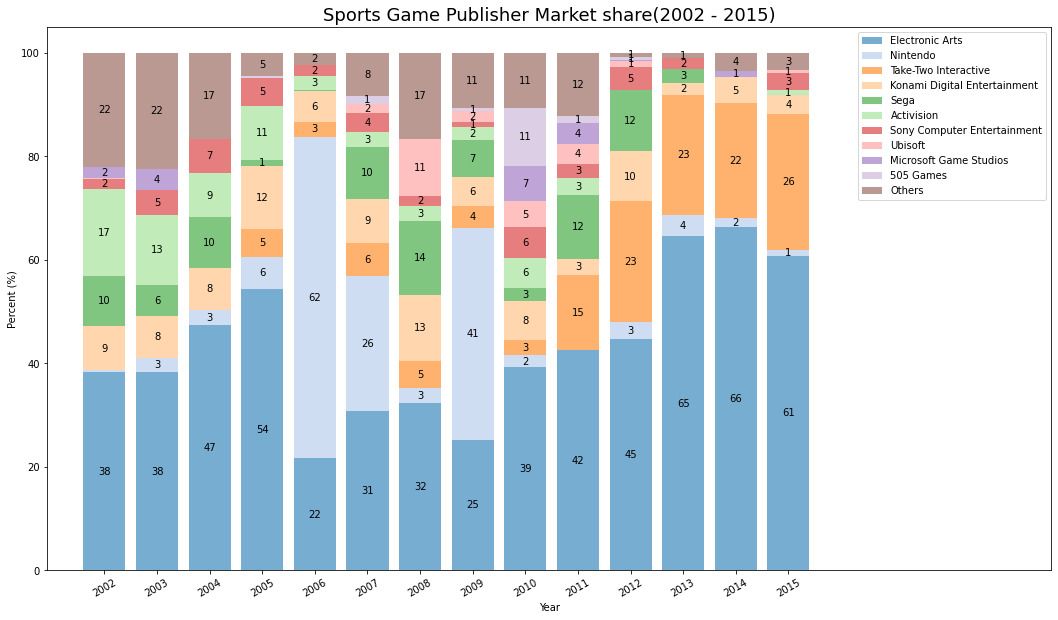

In [26]:
df_sports = df2002[df2002['Genre'] == 'Sports']
sports_by_year_publiser, sports_publisher_list, sports_color_list = market_share(df_sports, 'Publisher', 10)
fig, ax = market_share_plot(sports_by_year_publiser, sports_publisher_list, sports_color_list, column = 'Publisher')

ax.set_xlim(right=2020)
ax.set_title('Sports Game Publisher Market share(2002 - 2015)', fontsize=18)
plt.show()

Sports game market is dominated by Electronic Arts.


### 4.2.1 Electronic Arts Sports Games:

In [27]:
df_ea_sports = df2002[(df2002['Genre'] == 'Sports') & (df2002['Publisher'].str.contains('Electronic')) & \
     (df2002['Global_Sales'] > 2)].sort_values(['Year', 'Global_Sales'])

df_ea_sports[['Name','Year','Genre','Platform','Global_Sales', 'Publisher']]

,Name,Year,Genre,Platform,Global_Sales,Publisher
392,FIFA Soccer 2003,2002,Sports,PS2,3.40,Electronic Arts
279,Madden NFL 2003,2002,Sports,PS2,4.14,Electronic Arts
839,NBA Live 2004,2003,Sports,PS2,2.03,Electronic Arts
591,NBA Live 2005,2004,Sports,PS2,2.59,Electronic Arts
334,FIFA Soccer 2005,2004,Sports,PS2,3.70,Electronic Arts
238,Madden NFL 2005,2004,Sports,PS2,4.53,Electronic Arts
269,FIFA Soccer 06,2005,Sports,PS2,4.21,Electronic Arts
211,Madden NFL 06,2005,Sports,PS2,4.91,Electronic Arts
283,FIFA Soccer 07,2006,Sports,PS2,4.11,Electronic Arts
240,Madden NFL 07,2006,Sports,PS2,4.49,Electronic Arts


FIFA, Madden NFL, Skate are the games series from Electronic Arts.Ball fans are really caught by them. 

### 4.2.2 Take-Two Interactive Sports Games

In [28]:
df_t2_sports = df2002[(df2002['Genre'] == 'Sports') & (df2002['Publisher'].str.contains('Take-Two')) & \
     (df2002['Global_Sales'] > 2)].sort_values(['Year', 'Global_Sales'])

df_t2_sports[['Name','Year','Genre','Platform','Global_Sales', 'Publisher']]

,Name,Year,Genre,Platform,Global_Sales,Publisher
776,NBA 2K12,2011,Sports,PS3,2.11,Take-Two Interactive
584,NBA 2K12,2011,Sports,X360,2.62,Take-Two Interactive
623,NBA 2K13,2012,Sports,PS3,2.48,Take-Two Interactive
468,NBA 2K13,2012,Sports,X360,3.00,Take-Two Interactive
823,NBA 2K14,2013,Sports,PS3,2.05,Take-Two Interactive
625,NBA 2K14,2013,Sports,X360,2.47,Take-Two Interactive
661,NBA 2K15,2014,Sports,PS4,2.38,Take-Two Interactive
681,NBA 2K16,2015,Sports,XOne,2.32,Take-Two Interactive
314,NBA 2K16,2015,Sports,PS4,3.85,Take-Two Interactive


NBA 2K series really take a bite on Electronic Arts.

## 4.3 Shooter

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


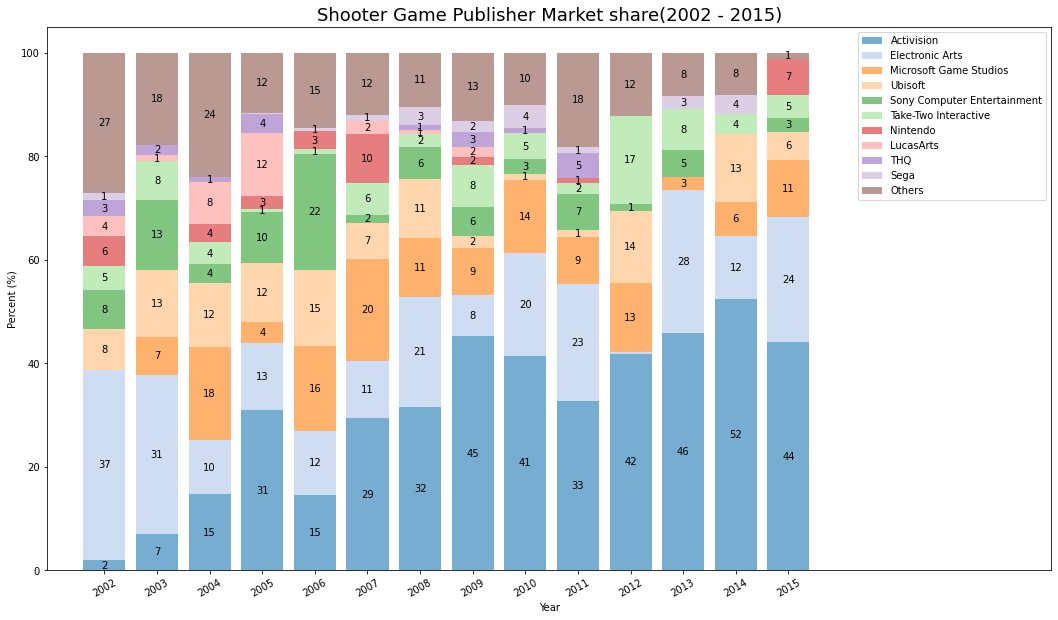

In [29]:
df_shooter = df2002[df2002['Genre'] == 'Shooter']
shooter_by_year_publiser, shootter_list, color_list = market_share(df_shooter, 'Publisher', 10)
fig, ax = market_share_plot(shooter_by_year_publiser, shootter_list, color_list, column = 'Publisher')

ax.set_xlim(right=2020)
ax.set_title('Shooter Game Publisher Market share(2002 - 2015)', fontsize=18)
plt.show()

In [30]:
df_activision_shooter = df2002[(df2002['Genre'] == 'Shooter') & (df2002['Publisher'] =='Activision') ].\
     sort_values(['Year', 'Global_Sales'], ascending=False)

df_activision_shooter[['Name','Year','Genre','Platform','Global_Sales', 'Publisher']].head(20)


,Name,Year,Genre,Platform,Global_Sales,Publisher
33,Call of Duty: Black Ops 3,2015,Shooter,PS4,14.24,Activision
101,Call of Duty: Black Ops 3,2015,Shooter,XOne,7.30,Activision
905,Destiny: The Taken King,2015,Shooter,PS4,1.91,Activision
967,Call of Duty: Black Ops 3,2015,Shooter,PS3,1.79,Activision
999,Call of Duty: Black Ops 3,2015,Shooter,X360,1.76,Activision
1737,Destiny: The Taken King,2015,Shooter,XOne,1.17,Activision
4698,Destiny: The Taken King,2015,Shooter,PS3,0.41,Activision
5002,Destiny: The Taken King,2015,Shooter,X360,0.38,Activision
7050,Call of Duty: Black Ops 3,2015,Shooter,PC,0.23,Activision
93,Call of Duty: Advanced Warfare,2014,Shooter,PS4,7.60,Activision


Call of Duty series is the Rocket Star for Activion.

### 4.3.2 Electronic Arts Shooter Games

In [31]:
df_ea_shooter = df2002[(df2002['Genre'] == 'Shooter') & (df2002['Publisher'] =='Electronic Arts') & \
     (df2002['Global_Sales'] > 2)].sort_values(['Year', 'Global_Sales'])

df_ea_shooter[['Name','Year','Genre','Platform','Global_Sales', 'Publisher']]

,Name,Year,Genre,Platform,Global_Sales,Publisher
403,James Bond 007: Nightfire,2002,Shooter,PS2,3.33,Electronic Arts
114,Medal of Honor: Frontline,2002,Shooter,PS2,6.83,Electronic Arts
190,Medal of Honor: Rising Sun,2003,Shooter,PS2,5.13,Electronic Arts
685,James Bond 007: Everything or Nothing,2004,Shooter,PS2,2.31,Electronic Arts
572,Medal of Honor Heroes,2006,Shooter,PSP,2.65,Electronic Arts
369,Left 4 Dead,2008,Shooter,X360,3.52,Electronic Arts
301,Left 4 Dead 2,2009,Shooter,X360,3.99,Electronic Arts
582,Medal of Honor,2010,Shooter,X360,2.62,Electronic Arts
517,Medal of Honor,2010,Shooter,PS3,2.83,Electronic Arts
477,Battlefield: Bad Company 2,2010,Shooter,PS3,2.97,Electronic Arts


Battlefield series , Medal of Honor series, Star Wars Battlefront series are the main shooter product from Electronic Arts.

# 5. Develpment of Publishers

## 5.1 First Year Salse

In [61]:
publisher_by_year = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().unstack(0)
total = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()
publishers_duration = total.groupby(['Publisher'])['Year'].agg(['min', 'max']).reset_index()
publishers_duration['first_sales'] = publishers_duration.\
    apply(lambda x:  publisher_by_year.loc[x['Publisher'],x['min']], axis = 1)
publishers_duration['last_sales'] = publishers_duration.\
    apply(lambda x:  publisher_by_year.loc[x['Publisher'],x['max']], axis = 1)    
publishers_duration['max_sales'] = publishers_duration.\
    apply(lambda x:  publisher_by_year.loc[x['Publisher'], : ].max(), axis = 1)
publishers_duration['mean_sales'] = publishers_duration.\
    apply(lambda x:  publisher_by_year.loc[x['Publisher'], : ].mean(), axis = 1)
publishers_duration['last_year'] = publishers_duration['max'] - publishers_duration['min'] +1


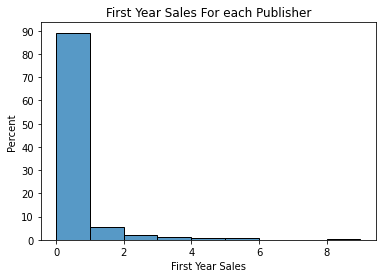

In [62]:
sns.histplot(publishers_duration['first_sales'], stat='percent', bins=range(0, 10))
plt.xlabel('First Year Sales')
plt.yticks(range(0,100,10))
plt.title('First Year Sales For each Publisher')
plt.show()

About 90% Publisher's first year sales is bellow 1 million.

In [63]:
publisher_below_1 =  publishers_duration[(publishers_duration['max_sales']<1) & (publishers_duration['min'] <2015)]
publisher_below_1_2015 = publisher_below_1[publisher_below_1['max']<2015] 

print('{:.2f}% of the publisher, whose first year sales are bellow 1 million, disappeared on the market.'.\
    format(100* publisher_below_1_2015.shape[0]/ publisher_below_1.shape[0]))
print('The average life time of publishers whose first year sales are bellow 1 million: {:.2f} years.'.\
    format(publisher_below_1_2015['last_year'].mean()))

91.40% of the publisher, whose first year sales are bellow 1 million, disappeared on the market.
The average life time of publishers whose first year sales are bellow 1 million: 3.31 years.


In [64]:
publisher_above_1 =  publishers_duration[(publishers_duration['max_sales']>1) & (publishers_duration['min'] <2015)]
publisher_above_1_2015 = publisher_above_1[publisher_above_1['max']<2015] 

print('{:.2f}% of the publisher, whose first year sales are bellow 1 million, disappeared on the market.'.\
    format(100*publisher_above_1_2015.shape[0]/ publisher_above_1.shape[0]))
print('The average life time of publishers whose first year sales are bellow 1 million: {:.2f} years.'.\
    format(publisher_above_1_2015['last_year'].mean()))


73.53% of the publisher, whose first year sales are bellow 1 million, disappeared on the market.
The average life time of publishers whose first year sales are bellow 1 million: 8.01 years.


As a publisher, if you failed on the first year, that is almost the end of the story.

## 5.2 Top Publisher

Publishers whose average annual sales are above 10 million

In [65]:

publisher_large =  publishers_duration[(publishers_duration['mean_sales']>10) &\
         (publishers_duration['min'] <2014)]
publisher_large_2015 = publisher_large[publisher_large['max'] == 2015] 

print('{:.2f}% of the medium publisher,still on the market.'.\
    format(100*publisher_large_2015.shape[0]/ publisher_large.shape[0]))
print('The average life time of medium publishers: {:.2f} years.'.\
    format(publisher_large_2015['last_year'].mean()))

90.00% of the medium publisher,still on the market.
The average life time of medium publishers: 22.33 years.


## 5.3 Medium-Size Publisher

Publishers whose average annual sales are between  1 million and 10 million

In [66]:
publisher_medium =  publishers_duration[(publishers_duration['mean_sales']>1) &\
     (publishers_duration['mean_sales']<10) &\
         (publishers_duration['min'] <2014)]
publisher_medium_2015 = publisher_medium[publisher_medium['max'] == 2015] 

print('{:.2f}% of the medium publisher,still on the market.'.\
    format(100*publisher_medium_2015.shape[0]/ publisher_medium.shape[0]))
print('The average life time of medium publishers: {:.2f} years.'.\
    format(publisher_medium['last_year'].mean()))

26.32% of the medium publisher,still on the market.
The average life time of medium publishers: 10.44 years.


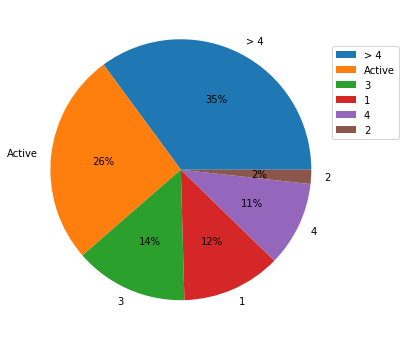

In [103]:
plt.figure(figsize=(8,6))
medium_status = publisher_medium[['last_year','max']].apply(lambda x: 'Active' if x['max']==2015 
    else( x['last_year'] if x['last_year']<=4 else '> 4'), axis=1)
medium_year_status = medium_status.value_counts()
plt.pie(medium_year_status, labels=medium_year_status.index, autopct='%.0f%%')
plt.legend(medium_year_status.index,loc="upper right",bbox_to_anchor=(0.9,0.8),  fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()

35% of medium publisher can last more than 4 years, but still disappeared on the market

## 5.4 Small Publisher

Publishers whose average annual sales are below  1 million

In [67]:
publisher_small =  publishers_duration[(publishers_duration['max_sales']<1) &\
         (publishers_duration['min'] <2014)]
publisher_small_2015 = publisher_small[publisher_small['max'] == 2015] 

print('{:.2f}% of the small publisher,still on the market.'.\
    format(100*publisher_small_2015.shape[0]/ publisher_small.shape[0]))
print('The average life time of small publishers: {:.2f} years.'.\
    format(publisher_small['last_year'].mean()))

7.30% of the small publisher,still on the market.
The average life time of small publishers: 3.68 years.


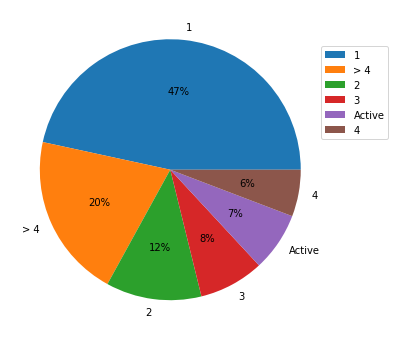

In [104]:
plt.figure(figsize=(8,6))
small_status = publisher_small[['last_year','max']].apply(lambda x: 'Active' if x['max']==2015 
    else( x['last_year'] if x['last_year']<=4 else '> 4'), axis=1)
small_year_status = small_status.value_counts()
plt.pie(small_year_status, labels=small_year_status.index, autopct='%.0f%%')
plt.legend(small_year_status.index,loc="upper right",bbox_to_anchor=(0.9,0.8),  fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()

47% small publishers failed after a year, a much more brutal combat.

## 6 Strategy

The video market seems to be a Winner-take-all market, can small and medium-size publisher survive?


## 6.1 Small publisher
We will focus on the small publishers that last more than 5 years are still active on the market.

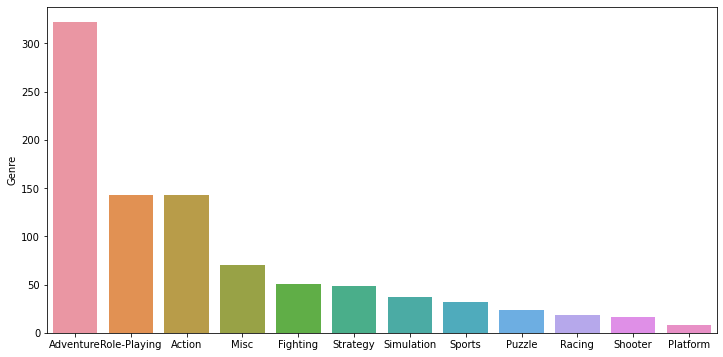

In [57]:
long_last_small = publishers_duration[(publishers_duration['last_year'] >=5) & \
    (publishers_duration['max'] == 2015) & \
    (publishers_duration['mean_sales'] < 1)]

df_long_last_small = df[df['Publisher'].isin(long_last_small['Publisher'])]
long_last_small_genre = df_long_last_small['Genre'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=long_last_small_genre.index, y=long_last_small_genre)
#plt.xticks(rotation=20)
plt.show()

These small publishers avoid direct combat with top bublishers, they are more focused on Adventure, Role-Playing, Action , Misc, Fighting, Strategy and simulation Games.


## 6.2 Medium-size publisher
We will focus on the medium-size publishers that last more than 5 years are still active on the market.

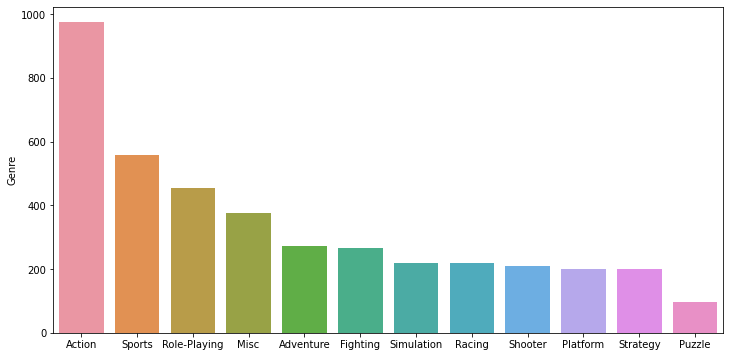

In [55]:
long_last_medium = publishers_duration[(publishers_duration['last_year'] >=5) & \
    (publishers_duration['max'] == 2015) & \
    (publishers_duration['mean_sales'] > 1) & \
    (publishers_duration['mean_sales'] < 10)]

df_long_last_medium = df[df['Publisher'].isin(long_last_medium['Publisher'])]
long_last_medium_genre = df_long_last_medium['Genre'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x = long_last_medium_genre.index, y = long_last_medium_genre)
#plt.xticks(rotation=10)
plt.show()

These medium-size publishers chose the battle at action games, which have the biggest market share and even the top publisher can not get all the market.

# Conclusion

1. The video game industry start on 1980, after 25 years development, the industry is at Decline Stage.
2. Top 5 Publishers have almost 50% of the market. Games Series are cash makers.
3. Action, sports and shooter are the top video game genres.
4. If you dont have a hit probuct, you would not last long, but you still have a chance to survive, make your strategy wisely.